### Machine Learning Fashionista 2.0
_Dennis Kageni, April 2020_

---------------------------

In this assignment we revisit the dataset from the dimension reduction unit. The pictures of clothing are all originally taken from ImageNet, which is a large dataset containing over a million photos with many different categories. Every year there is a competition to see which techniques perform the best. The winning entry is then open-sourced and made available to all machine learning researchers for further research or to allow the development of novel applications.


Now we want to compare SVMs and deep neural networks.


In [ ]:
import glob
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#file paths
men = glob.glob("Man's Clothing - n03746330/*.JPEG")
women = glob.glob("Woman's Clothing - n04596852/*.JPEG")

def imgs_to_array(filename,size):
    img = Image.open(filename)
    img = img.resize(size)
    return np.array(img).reshape(1,-1)

data = [
    (imgs_to_array(path,(150,150)),1)
        for path in men] + [
    (imgs_to_array(path,(150,150)),0)
        for path in women]

# pull out the features and the labels
np.random.shuffle(data)

X = np.array([feat for (feat,lab) in data]).reshape(-1,150*150*3)
y = np.array([lab for (feat,lab) in data]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #ideal split

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

#verify results
print("Splitting dataset into 80% training data and 20% testing data")
print("X   Train N: {}, X   Test N: {}".format(X_train.shape, X_test.shape))
print("Y   Train N: {}, Y   Test N: {}".format(y_train.shape, y_test.shape))
print("_________")

Splitting dataset into 80% training data and 20% testing data
X   Train N: (2009, 67500), X   Test N: (503, 67500)
Y   Train N: (2009, 1), Y   Test N: (503, 1)
_________


## **1. Support Vector Machines**

* Train a support vector classifier using each of the following kernels:
    * Linear
    * Poly (degree = 2)
    * RBF
* If you encounter any issues with training time or memory issues, then you may use a reduced dataset, but carefully detail how you reduced the dataset.
* Report your error rates on the testing dataset for the different kernels.



In [ ]:
# Creating my model
from sklearn.svm import SVC

clf_linear = SVC(kernel='linear', gamma='auto') # linear kernel
clf_poly = SVC(kernel='poly', degree=2, gamma='auto') # poly kernel
clf_RBF = SVC(kernel='rbf', gamma='auto') #rbf kernel

In [ ]:
from sklearn.metrics import accuracy_score

#Creating a function that will fit my model to both test and train data, and return accuracy rates
def classifiers(X_train, y_train, X_test, y_test, clf):
    clf.fit(X_train, y_train.ravel())
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train_pred, y_train)
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test_pred, y_test)
    return test_accuracy
        

In [ ]:
# linear
print("Accuracy: Linear =", classifiers(X_train, y_train, X_test, y_test, clf_linear))

Accuracy: Linear = 0.6123260437375746


In [ ]:
# poly(degree=2)
print("Accuracy: Poly(degreee=2) =", classifiers(X_train, y_train, X_test, y_test, clf_poly))

Accuracy: Poly(degreee=2) = 0.6500994035785288


In [ ]:
# RBF
print("Accuracy: RBF =", classifiers(X_train, y_train, X_test, y_test, clf_RBF))

Accuracy: RBF = 0.47912524850894633


## **2. Deep Neural Networks**

### Loading and preparing the dataset


In [ ]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
np.random.seed(42)


Using TensorFlow backend.


In [ ]:
# preparing the dataset
men_files = glob.glob("Man's Clothing - n03746330/*.JPEG")
women_files = glob.glob("Woman's Clothing - n04596852/*.JPEG")

len(men_files), len(women_files)

(1242, 1270)

In [ ]:
# now we want 1600 images for training, 400 images for validation and 400 images for testing
# with equal representation from both clothing categories

men_train = np.random.choice(men_files, size=800, replace=False)
women_train = np.random.choice(women_files, size=800, replace=False)
men_files = list(set(men_files) - set(men_train))
women_files = list(set(women_files) - set(women_train))

men_val = np.random.choice(men, size=200, replace=False)
women_val = np.random.choice(women, size=200, replace=False)
men_files = list(set(men_files) - set(men_val))
women_files = list(set(women_files) - set(women_val))

men_test = np.random.choice(men_files, size=200, replace=False)
women_test = np.random.choice(women_files, size=200, replace=False)

print('Men dataset:', men_train.shape, men_val.shape, men_test.shape)
print('Women dataset:', women_train.shape, women_val.shape, women_test.shape)


# saving files in directory as separate folders
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

train_files = np.concatenate([men_train, women_train])
validate_files = np.concatenate([men_val, women_val])
test_files = np.concatenate([men_test, women_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)


Men dataset: (800,) (200,) (200,)
Women dataset: (800,) (200,) (200,)


In [ ]:
# load dataset
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('_')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('_')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)


Train dataset shape: (1600, 150, 150, 3) 	Validation dataset shape: (400, 150, 150, 3)


(150, 150, 3)


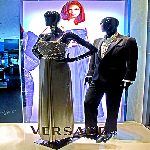

In [ ]:
# scaling each image with pixel values btw (0, 255) to values between (0,1)
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

# peek at sample image from training data
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

Here, I use `batch_size` of 30. I train the model over 30 epochs and validate it over the validation set of 400. I also encode the class labels into numeric values. `n04596852` represents women clothing and is now represented by `1`; `n03746330` represents male clothing and is now represented by `1`

In [ ]:
batch_size = 30 # total number of images passed onto the model per iteration
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[790:800], train_labels_enc[790:800])

['n03746330', 'n03746330', 'n04596852', 'n03746330', 'n04596852', 'n04596852', 'n03746330', 'n03746330', 'n04596852', 'n03746330'] [0 0 1 0 1 1 0 0 1 0]


### Using Keras load the VGG16 network. 

In [ ]:
# load VGG-16 Model; freeze all the 5 convolution blocks
# we do not need the last three layers since I'll be using my own
# fully connected dense layers to check if clothing is male/female

import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.models import Model
import keras
%matplotlib inline

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False
    
vgg_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
____________________________________________________________

In [ ]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
print("Trainable layers:", vgg_model.trainable_weights)


Trainable layers: []


**Rationale:**

Since we're leveraging the VGG16 network which should have already learned features that would be useful for this problem, we will only instantiate the convolutional part of the model (i.e, everything up to the fully-connected layers). I'll then run the model on the training and validation data once and record the ouput("bottleneck features") from the VGG16 model into two numpy arrays. Then I'll train a small fully-connected model on top of the stored features. This just helps with computational efficiency


In [ ]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [ ]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (1600, 8192) 	Validation Bottleneck Features: (400, 8192)


### Implementing Transfer Learning with VGG-16

In [ ]:
# architecture of our deep neural network classifier
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 1s 322us/step - loss: 0.6137 - accuracy: 0.6500 - val_loss: 0.6353 - val_accuracy: 0.6325
Epoch 2/30
1600/1600 [==============================] - 0s 194us/step - loss: 0.4687 - accuracy: 0.7756 - val_loss: 0.3892 - val_accuracy: 0.8100
Epoch 3/30
1600/1600 [==============================] - 0s 191us/step - loss: 0.4087 - accuracy: 0.8131 - val_loss: 0.3586 - val_accuracy: 0.8400
Epoch 4/30
1600/1600 [==============================] - 0s 193us/step - loss: 0.3467 - accuracy: 0.8494 - val_loss: 0.3026 - val_accuracy: 0.8600
Epoch 5/30
1600/1600 [==============================] - 0s 190us/step - loss: 0.2955 - accuracy: 0.8719 - val_loss: 0.2922 - val_accuracy: 0.8600
Epoch 6/30
1600/1600 [==============================] - 0s 193us/step - loss: 0.2584 - accuracy: 0.8875 - val_loss: 0.2668 - val_accuracy: 0.8750
Epoch 7/30
1600/1600 [==============================] - 0s 193us/step - loss:

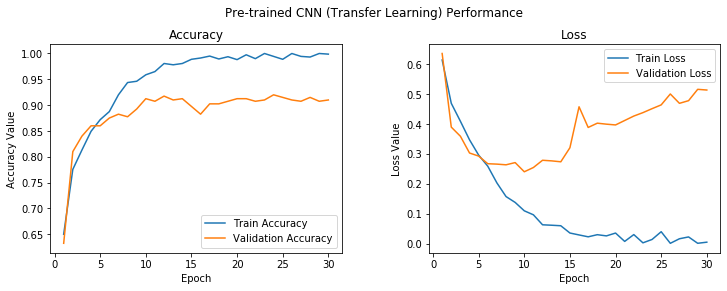

In [ ]:
# train
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


Right away, our validation accuracy of 91% is an almost 30% improvement from the best linear method. However, the gap between the model train and validation accuracy after the fifth epoch is a sign that the model may be overfitting. To remedy this, I will implement an image augmentation strategy on this model

### Implementing Transfer Learning with VGG-16 but with image augmentation

Taking the raw images and then performing several transformations:

* Zooming the image randomly by a factor of 0.3 using the zoom_range parameter.
* Rotating the image randomly by 50 degrees using the rotation_range parameter.
* Translating the image randomly horizontally or vertically by a 0.2 factor of the image’s width or height using the width_shift_range and the height_shift_range parameters.
* Applying shear-based transformations randomly using the shear_range parameter.
* Randomly flipping half of the images horizontally using the horizontal_flip parameter.
* Leveraging the fill_mode parameter to fill in new pixels for images after we apply any of the preceding operations (especially rotation or translation). In this case, we just fill in the new pixels with their nearest surrounding pixel values.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_ = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator_ = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

model_1 = Sequential()
model_1.add(vgg_model)
model_1.add(Dense(512, activation='relu', input_dim=input_shape))
model_1.add(Dropout(0.3))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(1, activation='sigmoid'))

# reducing the default learning rate by a factor of 10 for our optimizer   
# to prevent the model from getting stuck in a local minima or overfit
# since we're training for 100 epochs

model_1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_25 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
__________________________________

Epoch 1/150
100/100 [==============================] - 19s 192ms/step - loss: 0.1330 - accuracy: 0.9634 - val_loss: 0.1848 - val_accuracy: 0.9420
Epoch 2/150
100/100 [==============================] - 19s 186ms/step - loss: 0.1374 - accuracy: 0.9679 - val_loss: 0.3446 - val_accuracy: 0.9070
Epoch 3/150
100/100 [==============================] - 18s 177ms/step - loss: 0.1243 - accuracy: 0.9673 - val_loss: 0.8432 - val_accuracy: 0.9050
Epoch 4/150
100/100 [==============================] - 18s 177ms/step - loss: 0.1015 - accuracy: 0.9736 - val_loss: 4.4548e-04 - val_accuracy: 0.9380
Epoch 5/150
100/100 [==============================] - 18s 176ms/step - loss: 0.1096 - accuracy: 0.9742 - val_loss: 0.1809 - val_accuracy: 0.9240
Epoch 6/150
100/100 [==============================] - 17s 174ms/step - loss: 0.0958 - accuracy: 0.9716 - val_loss: 0.2366 - val_accuracy: 0.9380
Epoch 7/150
100/100 [==============================] - 17s 173ms/step - loss: 0.1344 - accuracy: 0.9706 - val_loss: 3.58

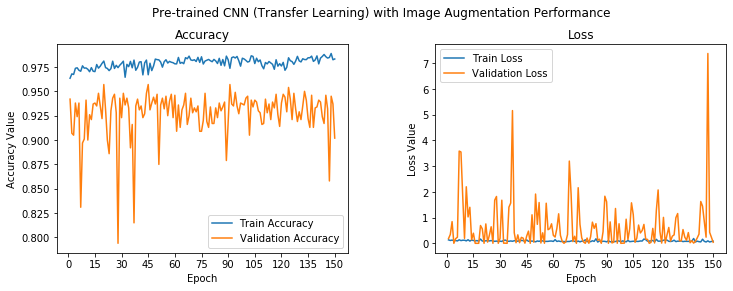

In [ ]:
history_1 = model_1.fit_generator(train_generator_, steps_per_epoch=100, epochs=150,
                              validation_data=val_generator_, validation_steps=50, verbose=1)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,151))
ax1.plot(epoch_list, history_1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_1.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 151, 15))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 151, 15))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

We still have an accuracy of ~90%. In addition, the train and validation accuracy values are closer so we can infer that the model is overfitting less this time round

### Implementing Transfer Learning with VGG-16 but with image augmentation and fine-tuning

Applying fine-tuning to the VGG model, where we will unfreeze the last two blocks (Block 4 and Block 5) so that their weights get updated in each epoch (per batch of data) as we train our own model. 

In [ ]:
# fine-tuning
## unfreeze convolution blocks 4 and 5 while keeping the first three blocks frozen
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
# print("Trainable layers:", vgg_model.trainable_weights)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_2 = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator_2 = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)


model_2 = Sequential()
model_2.add(vgg_model)
model_2.add(Dense(512, activation='relu', input_dim=input_shape))
model_2.add(Dropout(0.3))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_28 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
_________________________________

Epoch 1/150
100/100 [==============================] - 19s 190ms/step - loss: 0.7375 - accuracy: 0.5250 - val_loss: 0.6022 - val_accuracy: 0.6740
Epoch 2/150
100/100 [==============================] - 19s 187ms/step - loss: 0.5426 - accuracy: 0.7122 - val_loss: 0.4747 - val_accuracy: 0.8630
Epoch 3/150
100/100 [==============================] - 18s 180ms/step - loss: 0.3056 - accuracy: 0.8818 - val_loss: 0.5918 - val_accuracy: 0.9070
Epoch 4/150
100/100 [==============================] - 18s 178ms/step - loss: 0.2094 - accuracy: 0.9295 - val_loss: 0.1540 - val_accuracy: 0.9110
Epoch 5/150
100/100 [==============================] - 18s 177ms/step - loss: 0.1510 - accuracy: 0.9527 - val_loss: 0.0624 - val_accuracy: 0.9350
Epoch 6/150
100/100 [==============================] - 17s 174ms/step - loss: 0.1239 - accuracy: 0.9581 - val_loss: 0.1182 - val_accuracy: 0.9280
Epoch 7/150
100/100 [==============================] - 18s 175ms/step - loss: 0.1006 - accuracy: 0.9676 - val_loss: 0.3691 -

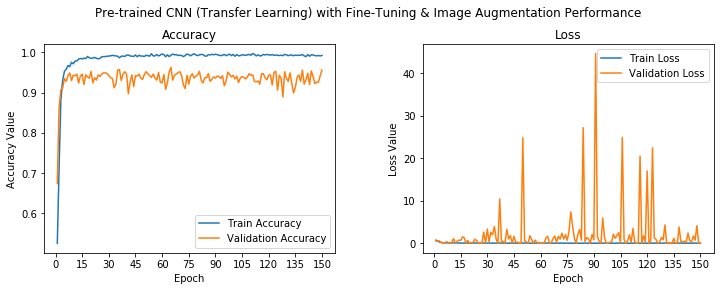

In [ ]:
history_2 = model_2.fit_generator(train_generator, steps_per_epoch=100, epochs=150,
                              validation_data=val_generator, validation_steps=50, verbose=1)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,151))
ax1.plot(epoch_list, history_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 151, 15))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 151, 15))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Fine-tuning has bumped our accuracy from 90% to 96%

### Loss Function: Binary cross-entropy
Apart from the obvious reason given the task at hand involves training a binary classifier that when given images, should predict if it is male clothing or female clothing. For example, we can rephrase this problem as: "is this clothing item for males" or "what is the probability of the clothing item being male". We would expect that male clothing would have a probability of 1 (and fall into the positiv class), while the female clothing would have a probabilty of 0 (and thus fall into the negative class). So when we fit a classification model, it will predict a probability of being male clothing for each of the clothing items. We can then need to evaluate how good/bad the predictions are - which is where the log loss function comes in! For bad predictions, we will get a high value; and for good predictions, we will get a low value for this binary classification

### Learning Transfer Performance + Comparision with linear methods

- The worst perfroming deep learning model still outperformed best performing linear method
- Compared to the linear methods where we train the algorithm to solve a specific task, deep transfer learning is more robust as we can use a pretrained model like VGG-16 for different types of computer vision related tasks. Therefore it has the potential for wider application; even for data that hasn't been seen before
- Also faster; base model took seconds. With image augmentation, 30 min; with image augmentation + fine-tuning, 25 min. On the other hand, each linear method ran for approximately 30min. Given the fact that we're dealing with an larger dataset, the deep learning approach would be preferred. 